第14章　演習問題　解答例

初期設定

In [ ]:
# 日本語化ライブラリ導入
!pip install japanize-matplotlib | tail -n 1

In [ ]:
# ライブラリのimport

# matplotlib日本語化対応ライブラリのインポート
import japanize_matplotlib

# NumPy用ライブラリ
import numpy as np

# Matplotlib中のpyplotライブラリのインポート
import matplotlib.pyplot as plt

# pandas用ライブラリ
import pandas as pd

# データフレーム表示用関数
from IPython.display import display

# 集計単位計算用関数
from datetime import datetime

In [12]:
# 表示オプション調整

# NumPy表示形式の設定
np.set_printoptions(
    suppress=True, precision=4, floatmode='fixed'
)

# グラフのデフォルトフォント指定
plt.rcParams["font.size"] = 14

# サイズ設定
plt.rcParams['figure.figsize'] = (6, 6)

# 方眼表示ON
plt.rcParams['axes.grid'] = True

# データフレームでの表示精度
pd.options.display.float_format = '{:.4f}'.format

# データフレームですべての項目を表示
pd.set_option("display.max_columns",None)

In [13]:
# Google Colaboratoryへのマウント
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


問題14-1【データの読み込みと確認】:　「data14_ex.csv」を読み込み、内容の概略の確認（項目、データ数、欠損値の有無、データ型、気温と降水量のグラフ表示）を行ってください。なお、ヘッダまで余分な2行がありますので、読み飛ばしを行ってください。


In [14]:
# CSVファイルの読み込み
df1 = pd.read_csv(
    '/content/drive/My Drive/Colab Notebooks/Python_Txt_toshimitsu/data14_ex.csv',
    header = 2, parse_dates=[0]
)
display(df1.head())
display(df1.tail())

,年月日時,気温(℃),降水量(mm)
0,2024-06-02 01:00:00,18.4000,0.0000
1,2024-06-02 02:00:00,18.3000,0.0000
2,2024-06-02 03:00:00,17.9000,0.0000
3,2024-06-02 04:00:00,16.6000,0.5000
4,2024-06-02 05:00:00,16.5000,0.0000


,年月日時,気温(℃),降水量(mm)
667,2024-06-29 20:00:00,24.5000,0.0000
668,2024-06-29 21:00:00,23.4000,0.0000
669,2024-06-29 22:00:00,22.9000,0.0000
670,2024-06-29 23:00:00,22.6000,0.0000
671,2024-06-30 00:00:00,22.9000,0.0000


In [15]:
# 欠損値の確認
df1.isnull().sum()


,0
年月日時,0
気温(℃),0
降水量(mm),0


In [16]:
# コード14.2.4 各項目のデータ型再確認
df1.dtypes

,0
年月日時,datetime64[ns]
気温(℃),float64
降水量(mm),float64


<Axes: xlabel='年月日時'>

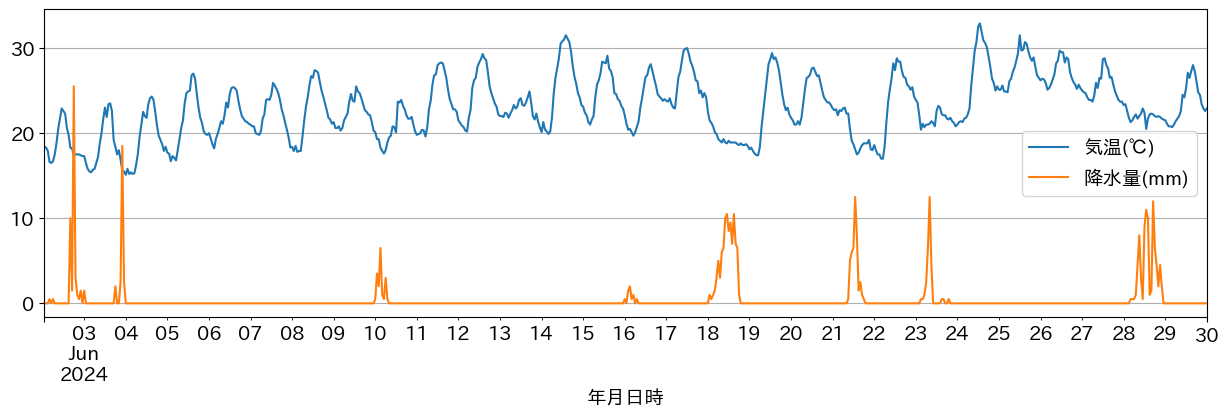

In [17]:
#　pandasのplotで全ての数値型の列データを、折れ線グラフを表示する
# グラフサイズの調整
plt.rcParams['figure.figsize'] = (15, 4)
# グラフ描画
df1.plot(x='年月日時')


問題14-2:　6月の第4週（6月16日（日）～6月22日（土））のデータを抽出し、気温と降水量のグラフを表示してください。



In [18]:
# 日付範囲指定を指定してデータを抽出

# 開始日　datetime型で定義
day_sta = pd.to_datetime('2024-06-16')
# 終了日　datetime型で定義
day_end = pd.to_datetime('2024-06-22')

# データ型の確認
print(day_sta, type(day_sta))
print(day_end, type(day_end))

# queryメソッドで絞り込み　検索条件はすべて変数で指定
term7 = df1.query(
    '年月日時 >=@day_sta and 年月日時 <= @day_end')

# 結果確認
display(term7)

2024-06-16 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
2024-06-22 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>


,年月日時,気温(℃),降水量(mm)
335,2024-06-16 00:00:00,22.1000,0.5000
336,2024-06-16 01:00:00,21.1000,0.0000
337,2024-06-16 02:00:00,20.4000,1.5000
338,2024-06-16 03:00:00,20.5000,2.0000
339,2024-06-16 04:00:00,20.1000,0.5000
...,...,...,...
475,2024-06-21 20:00:00,18.8000,0.0000
476,2024-06-21 21:00:00,19.2000,0.0000
477,2024-06-21 22:00:00,18.1000,0.0000
478,2024-06-21 23:00:00,18.0000,0.0000


<Axes: xlabel='年月日時'>

<Axes: xlabel='年月日時'>

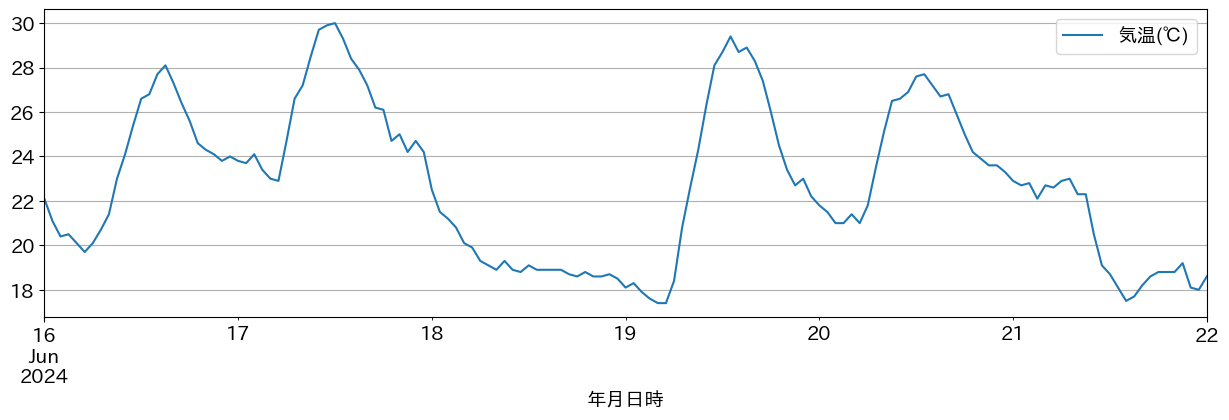

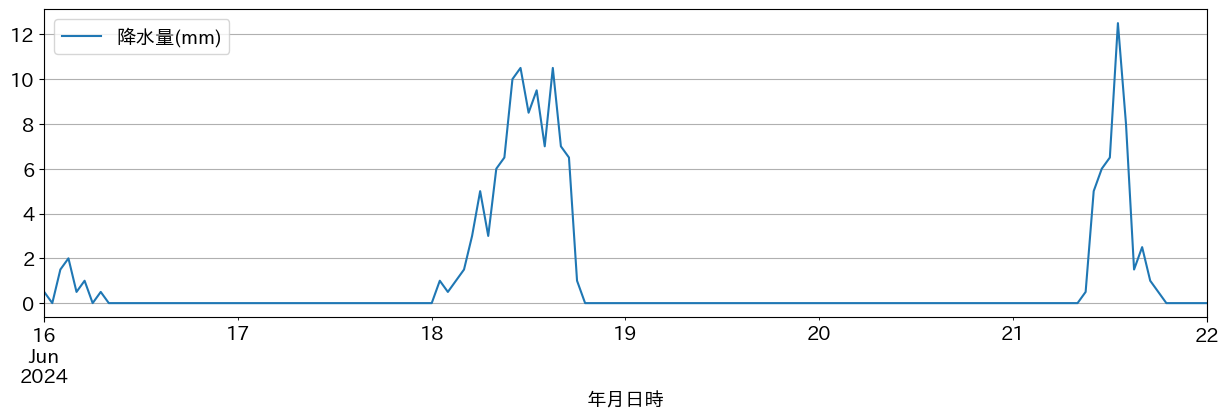

In [19]:
# グラフ表示
display(term7.plot(x='年月日時', y='気温(℃)'))
display(term7.plot(x='年月日時', y='降水量(mm)'))